In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [3]:

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)


In [4]:

# Preprocess the data
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
data = data.dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [5]:

# Define features and target variable
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']


In [6]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [8]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


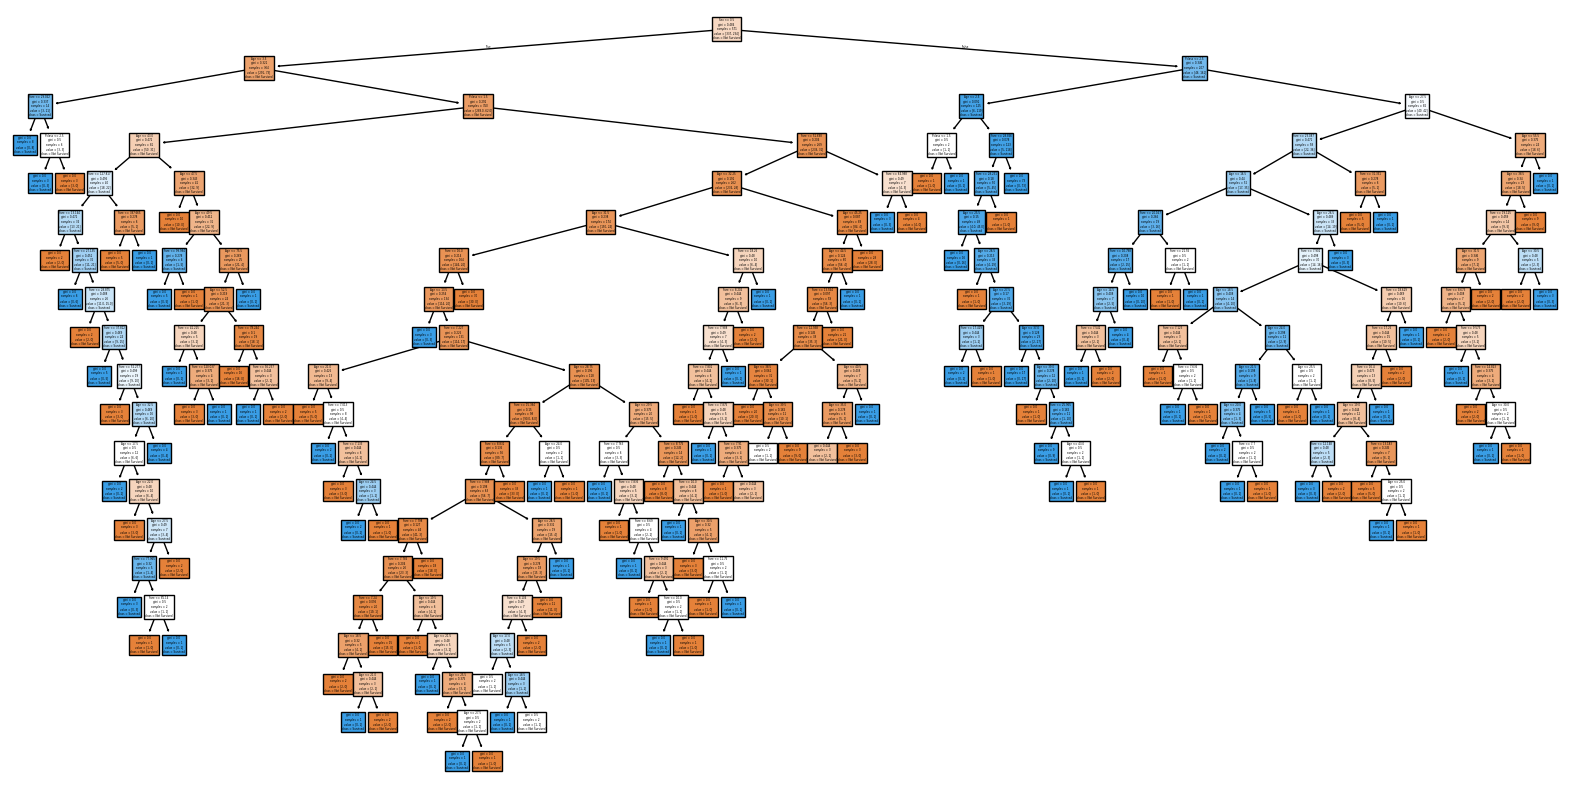

In [9]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [10]:
import interactive_decision_tree as idt


In [11]:
?idt.create_tree

Signature:
idt.create_tree(
    tree_model,
    X,
    target_names,
    save_path,
    target_colors=None,
    color_map='tab10',
    width=1200,
    height=1000,
)
Docstring:
visualize a sklearn Decision Tree Classifier
:param tree_model: a fitted sklearn Decision Tree Classifier
:param X: pandas DataFrame
    dataset model was fitted on
:param target_names: list
    list of names for targets
:param target_colors: list, default=None
    list of colors for targets
:param color_map: string, default=None
    matplotlib color map name, like 'Vega20'
:param width: int
    width of the html page
:param height: int
    height of the html page
File:      e:\idt library\interactive_decision_tree.py
Type:      function

In [12]:
idt.create_tree(tree_model=model,
                X=X_train,
                target_names=['Not Survived', 'Survived'],
                target_colors=['red', 'green'],
                save_path='titanic-tree.html')

Saved to titanic-tree.html


In [13]:
idt.create_sankey(tree_model=model,
                X=X_train,
                target_names=['Not Survived', 'Survived'],
                target_colors=['red', 'green'],
                save_path='titanic-sankey.html')

Saved to titanic-sankey.html


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

pruned_model = grid_search.best_estimator_


In [15]:

accuracy = accuracy_score(y_test, pruned_model.predict(X_test))
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.72


In [16]:
idt.create_tree(tree_model=pruned_model,
                X=X_train,
                target_names=['Not Survived', 'Survived'],
                target_colors=['red', 'green'],
                save_path='titanic-pruned-tree.html')

Saved to titanic-pruned-tree.html


In [17]:
idt.create_sankey(tree_model=pruned_model,
                X=X_train,
                target_names=['Not Survived', 'Survived'],
                target_colors=['red', 'green'],
                save_path='titanic-pruned-sankey.html')


Saved to titanic-pruned-sankey.html
